Import Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import joblib


Load Dataset

In [43]:
train =pd.read_csv('train.csv')


Column Names

In [44]:
print(train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Display Dataset

In [45]:
train.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Overview

Sex
male      577
female    314
Name: count, dtype: int64


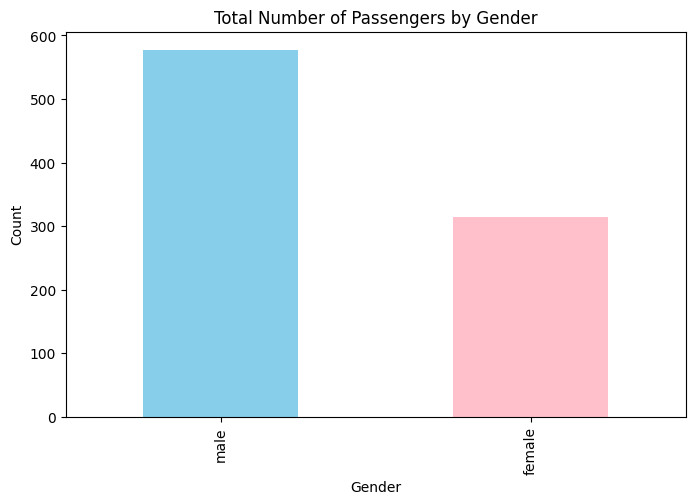

In [46]:
gender_counts = df['Sex'].value_counts()
print(gender_counts)
plt.figure(figsize=(8,5))
gender_counts.plot(kind='bar', color=['skyblue','pink'])
plt.title("Total Number of Passengers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/gender_distribution.png")
plt.show()

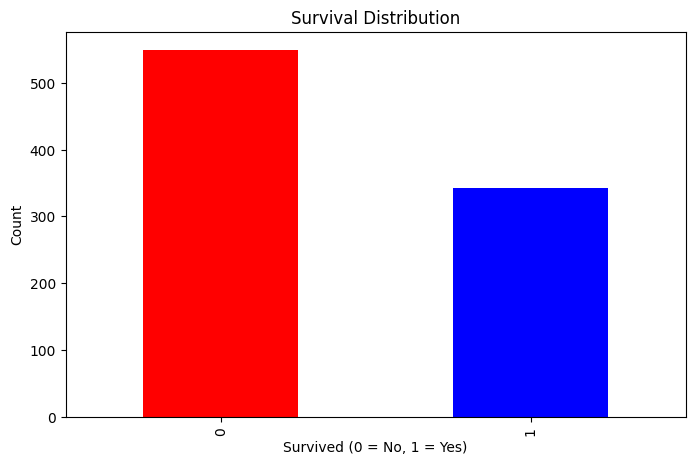

In [47]:
survival_counts = df['Survived'].value_counts().sort_index()  
plt.figure(figsize=(8,5))
survival_counts.plot(kind='bar', color=['red', 'blue']) 
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival _Distribution.png")
plt.show()


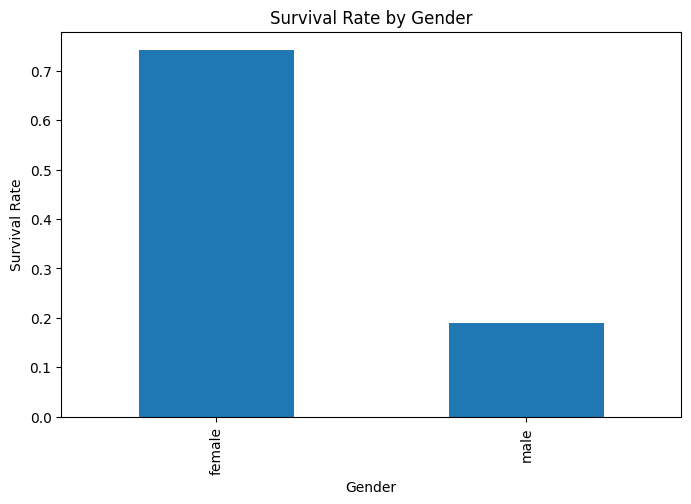

In [48]:
plt.figure(figsize=(8,5))
df.groupby("Sex")['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival_Rate_by_Gender.png")
plt.show()


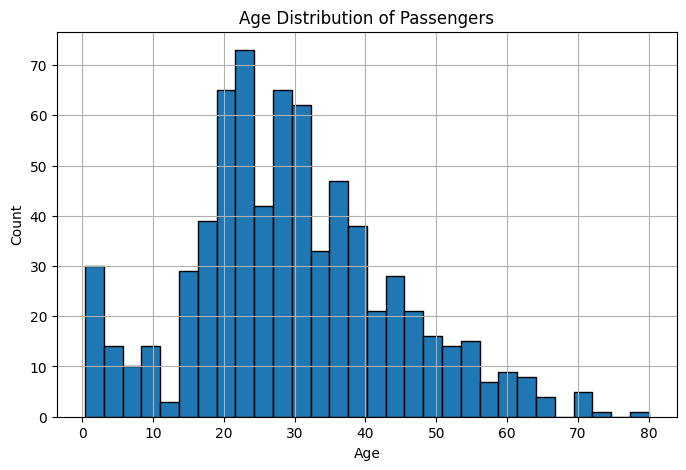

In [49]:
plt.figure(figsize=(8,5))
df['Age'].hist(bins=30, edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Age_Distribution.png")
plt.show()


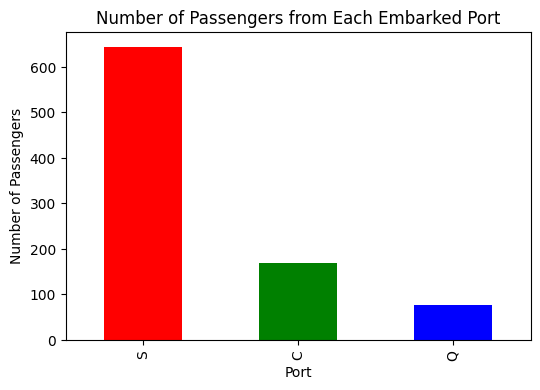

In [69]:
port_counts = df['Embarked'].value_counts()
plt.figure(figsize=(6,4))
port_counts.plot(kind='bar', color=['red','green','blue'])
plt.title("Number of Passengers from Each Embarked Port")
plt.xlabel("Port")
plt.ylabel("Number of Passengers")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Embarked_Port_Counts.png")
plt.show()

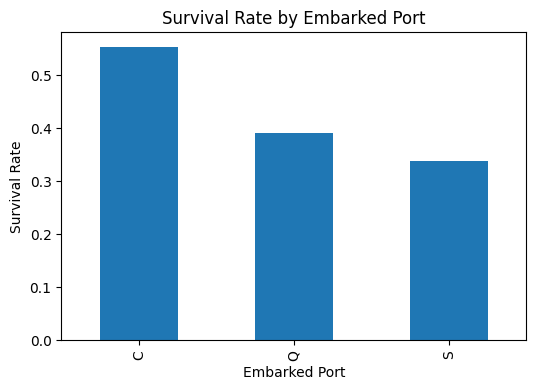

In [70]:
plt.figure(figsize=(6,4))
df.groupby("Embarked")['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival_Rate_by_Embarked.png")
plt.show()

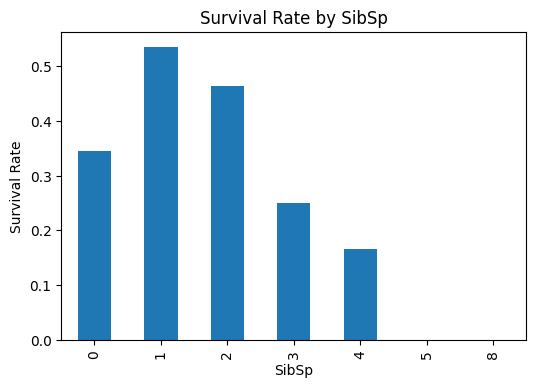

In [71]:
plt.figure(figsize=(6,4))
df.groupby("SibSp")['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survival Rate")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival_Rate_by_SibSp.png")
plt.show()

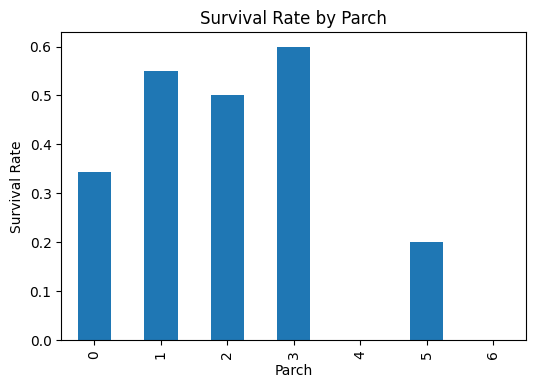

In [72]:
plt.figure(figsize=(6,4))
df.groupby("Parch")['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival_Rate_by_Parch.png")
plt.show()

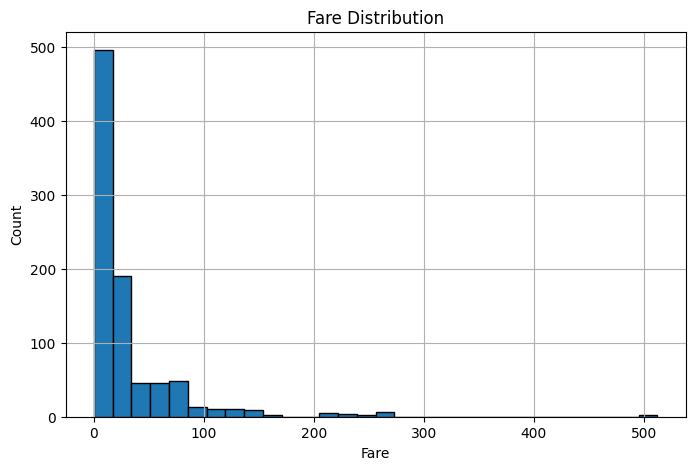

In [73]:
plt.figure(figsize=(8,5))
df['Fare'].hist(bins=30, edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Fare_Distribution.png")
plt.show()

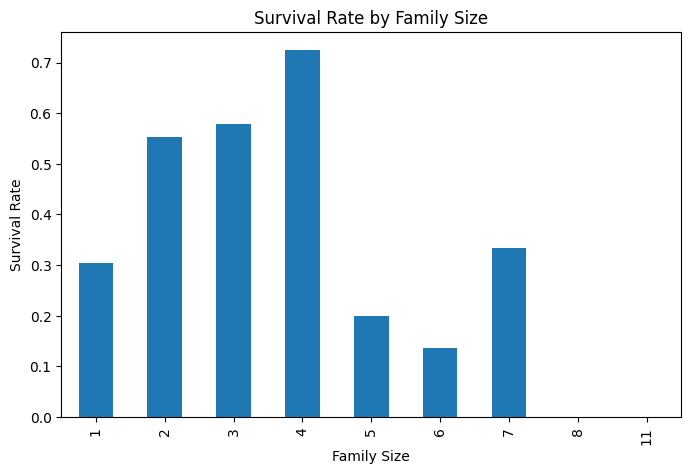

In [74]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(8,5))
df.groupby("FamilySize")['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.savefig("/home/aidev/Data/Shoaib/Titanic_Survival_Predictor/screenshots/eda/Survival_by_FamilySize.png")
plt.show()

Data Cleaning

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Total misiings values in each column

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:

mode_value = train["Embarked"].mode()[0]
train["Embarked"] = train["Embarked"].fillna(mode_value)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:

mode_value = train["Cabin"].mode()[0]
train["Cabin"] = train["Cabin"].fillna(mode_value)
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

##Age column missing values fill by mean

In [60]:
train['Age'] = train['Age'].fillna(train['Age'].mean())


In [61]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Feature Engineering

In [62]:
def feature_engineering(df):
    
    
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Other', 'Rev': 'Other', 'Col': 'Other', 'Major': 'Other',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Other', 'Sir': 'Other',
        'Don': 'Other', 'Countess': 'Other', 'Jonkheer': 'Other', 'Dona': 'Other'
    }
    df['Title'] = df['Title'].map(title_mapping).fillna('Other')
    
    
    df['HadCabin'] = df['Cabin'].notna().astype(int)
    
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    df['Embarked'] = df['Embarked'].map(embarked_mapping)
    
    
    title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
    df['Title'] = df['Title'].map(title_mapping)
    
    
    features = [
        'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
        'Embarked', 'Title', 'HadCabin', 'FamilySize', 'IsAlone'
    ]
    
    return df[features]



Features and Target

In [63]:

X = feature_engineering(train)
y = train['Survived']

Train-Test Split and Random Forest Model Initialization


In [64]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

Train  Random Forest Model

In [65]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Performance

In [66]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [67]:
model_package = {
    'model': model,
    'features': X.columns.tolist(),
    'version': '1.0.0',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'metrics': {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred)
    }
}


Save  Trained Model

In [68]:
joblib.dump(model_package, 'model.pkl')

['model.pkl']